In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns


# Data Extraction 

In [2]:
df_wildfire = sqlite3.connect('FPA_FOD_20170508.sqlite')


In [3]:
import sqlite3

# Connect to the SQLite database
conn = sqlite3.connect('FPA_FOD_20170508.sqlite')
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
table_names = cursor.fetchall()
table_names = [table[0] for table in table_names]
print("Tables in the database:", table_names,"\n")


Tables in the database: ['spatial_ref_sys', 'spatialite_history', 'sqlite_sequence', 'geometry_columns', 'spatial_ref_sys_aux', 'views_geometry_columns', 'virts_geometry_columns', 'geometry_columns_statistics', 'views_geometry_columns_statistics', 'virts_geometry_columns_statistics', 'geometry_columns_field_infos', 'views_geometry_columns_field_infos', 'virts_geometry_columns_field_infos', 'geometry_columns_time', 'geometry_columns_auth', 'views_geometry_columns_auth', 'virts_geometry_columns_auth', 'sql_statements_log', 'SpatialIndex', 'ElementaryGeometries', 'KNN', 'Fires', 'idx_Fires_Shape', 'idx_Fires_Shape_node', 'idx_Fires_Shape_rowid', 'idx_Fires_Shape_parent', 'NWCG_UnitIDActive_20170109'] 



In [4]:
print("Tables in the database:", table_names,"/n")

Tables in the database: ['spatial_ref_sys', 'spatialite_history', 'sqlite_sequence', 'geometry_columns', 'spatial_ref_sys_aux', 'views_geometry_columns', 'virts_geometry_columns', 'geometry_columns_statistics', 'views_geometry_columns_statistics', 'virts_geometry_columns_statistics', 'geometry_columns_field_infos', 'views_geometry_columns_field_infos', 'virts_geometry_columns_field_infos', 'geometry_columns_time', 'geometry_columns_auth', 'views_geometry_columns_auth', 'virts_geometry_columns_auth', 'sql_statements_log', 'SpatialIndex', 'ElementaryGeometries', 'KNN', 'Fires', 'idx_Fires_Shape', 'idx_Fires_Shape_node', 'idx_Fires_Shape_rowid', 'idx_Fires_Shape_parent', 'NWCG_UnitIDActive_20170109'] /n


In [5]:
table_names.remove('SpatialIndex')

In [6]:
table_names.remove('ElementaryGeometries')

In [7]:
table_names.remove('KNN')

In [8]:
table_names

['spatial_ref_sys',
 'spatialite_history',
 'sqlite_sequence',
 'geometry_columns',
 'spatial_ref_sys_aux',
 'views_geometry_columns',
 'virts_geometry_columns',
 'geometry_columns_statistics',
 'views_geometry_columns_statistics',
 'virts_geometry_columns_statistics',
 'geometry_columns_field_infos',
 'views_geometry_columns_field_infos',
 'virts_geometry_columns_field_infos',
 'geometry_columns_time',
 'geometry_columns_auth',
 'views_geometry_columns_auth',
 'virts_geometry_columns_auth',
 'sql_statements_log',
 'Fires',
 'idx_Fires_Shape',
 'idx_Fires_Shape_node',
 'idx_Fires_Shape_rowid',
 'idx_Fires_Shape_parent',
 'NWCG_UnitIDActive_20170109']

In [9]:
dataframes = {}

# Loop through table names and extract data into DataFrames
for table_name in table_names:
    # Read data from the database and assign it to a DataFrame
    query = f"SELECT * FROM {table_name}"
    dataframes[table_name] = pd.read_sql_query(query, conn)


In [10]:
dataframes.keys()

dict_keys(['spatial_ref_sys', 'spatialite_history', 'sqlite_sequence', 'geometry_columns', 'spatial_ref_sys_aux', 'views_geometry_columns', 'virts_geometry_columns', 'geometry_columns_statistics', 'views_geometry_columns_statistics', 'virts_geometry_columns_statistics', 'geometry_columns_field_infos', 'views_geometry_columns_field_infos', 'virts_geometry_columns_field_infos', 'geometry_columns_time', 'geometry_columns_auth', 'views_geometry_columns_auth', 'virts_geometry_columns_auth', 'sql_statements_log', 'Fires', 'idx_Fires_Shape', 'idx_Fires_Shape_node', 'idx_Fires_Shape_rowid', 'idx_Fires_Shape_parent', 'NWCG_UnitIDActive_20170109'])

In [11]:
dataframes['idx_Fires_Shape']

,pkid,xmin,xmax,ymin,ymax
0,1064078,-166.869400,-166.869385,65.982597,65.982605
1,1064195,-166.269302,-166.269287,65.115898,65.115906
2,1729139,-166.166702,-166.166687,65.833298,65.833305
3,1064196,-166.152725,-166.152695,65.182594,65.182602
4,1064225,-166.029404,-166.029373,65.926895,65.926903
...,...,...,...,...,...
1880460,1420602,-82.699806,-82.699799,31.961100,31.961103
1880461,1490642,-82.711678,-82.711662,31.946709,31.946712
1880462,1490706,-82.697731,-82.697716,31.925175,31.925179
1880463,1675099,-82.710007,-82.709999,31.949663,31.949667


In [12]:
Fires = dataframes['Fires']

In [13]:
Fires.columns

Index(['OBJECTID', 'FOD_ID', 'FPA_ID', 'SOURCE_SYSTEM_TYPE', 'SOURCE_SYSTEM',
       'NWCG_REPORTING_AGENCY', 'NWCG_REPORTING_UNIT_ID',
       'NWCG_REPORTING_UNIT_NAME', 'SOURCE_REPORTING_UNIT',
       'SOURCE_REPORTING_UNIT_NAME', 'LOCAL_FIRE_REPORT_ID',
       'LOCAL_INCIDENT_ID', 'FIRE_CODE', 'FIRE_NAME',
       'ICS_209_INCIDENT_NUMBER', 'ICS_209_NAME', 'MTBS_ID', 'MTBS_FIRE_NAME',
       'COMPLEX_NAME', 'FIRE_YEAR', 'DISCOVERY_DATE', 'DISCOVERY_DOY',
       'DISCOVERY_TIME', 'STAT_CAUSE_CODE', 'STAT_CAUSE_DESCR', 'CONT_DATE',
       'CONT_DOY', 'CONT_TIME', 'FIRE_SIZE', 'FIRE_SIZE_CLASS', 'LATITUDE',
       'LONGITUDE', 'OWNER_CODE', 'OWNER_DESCR', 'STATE', 'COUNTY',
       'FIPS_CODE', 'FIPS_NAME', 'Shape'],
      dtype='object')

#I observed that, Except Fires table the rest tables are meta data and are not so usefull for Analysis 

In [14]:
pd.set_option('display.max_columns', None)

In [15]:
Fires

,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,LOCAL_FIRE_REPORT_ID,LOCAL_INCIDENT_ID,FIRE_CODE,FIRE_NAME,ICS_209_INCIDENT_NUMBER,ICS_209_NAME,MTBS_ID,MTBS_FIRE_NAME,COMPLEX_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
0,1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,0511,Plumas National Forest,1,PNF-47,BJ8K,FOUNTAIN,None,None,None,None,None,2005,2453403.5,33,1300,9.0,Miscellaneous,2453403.5,33.0,1730,0.10,A,40.036944,-121.005833,5.0,USFS,CA,63,063,Plumas,b'\x00\x01\xad\x10\x00\x00\xe8d\xc2\x92_@^\xc0...
1,2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,13,13,AAC0,PIGEON,None,None,None,None,None,2004,2453137.5,133,0845,1.0,Lightning,2453137.5,133.0,1530,0.25,A,38.933056,-120.404444,5.0,USFS,CA,61,061,Placer,b'\x00\x01\xad\x10\x00\x00T\xb6\xeej\xe2\x19^\...
2,3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,27,021,A32W,SLACK,None,None,None,None,None,2004,2453156.5,152,1921,5.0,Debris Burning,2453156.5,152.0,2024,0.10,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA,17,017,El Dorado,b'\x00\x01\xad\x10\x00\x00\xd0\xa5\xa0W\x13/^\...
3,4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,43,6,None,DEER,None,None,None,None,None,2004,2453184.5,180,1600,1.0,Lightning,2453189.5,185.0,1400,0.10,A,38.559167,-119.913333,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00\x94\xac\xa3\rt\xfa]...
4,5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,44,7,None,STEVENOT,None,None,None,None,None,2004,2453184.5,180,1600,1.0,Lightning,2453189.5,185.0,1200,0.10,A,38.559167,-119.933056,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00@\xe3\xaa.\xb7\xfb]\...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880460,1880461,300348363,2015CAIRS29019636,NONFED,ST-CACDF,ST/C&L,USCASHU,Shasta-Trinity Unit,CASHU,Shasta-Trinity Unit,591814,009371,None,ODESSA 2,None,None,None,None,None,2015,2457291.5,269,1726,13.0,Missing/Undefined,2457291.5,269.0,1843,0.01,A,40.481637,-122.389375,13.0,STATE OR PRIVATE,CA,None,None,None,b'\x00\x01\xad\x10\x00\x00P\xb8\x1e\x85\xeb\x9...
1880461,1880462,300348373,2015CAIRS29217935,NONFED,ST-CACDF,ST/C&L,USCATCU,Tuolumne-Calaveras Unit,CATCU,Tuolumne-Calaveras Unit,569419,000366,None,None,None,None,None,None,None,2015,2457300.5,278,0126,9.0,Miscellaneous,NaN,NaN,None,0.20,A,37.617619,-120.938570,12.0,MUNICIPAL/LOCAL,CA,None,None,None,b'\x00\x01\xad\x10\x00\x00\x00\x80\xbe\x88\x11...
1880462,1880463,300348375,2015CAIRS28364460,NONFED,ST-CACDF,ST/C&L,USCATCU,Tuolumne-Calaveras Unit,CATCU,Tuolumne-Calaveras Unit,574245,000158,None,None,None,None,None,None,None,2015,2457144.5,122,2052,13.0,Missing/Undefined,NaN,NaN,None,0.10,A,37.617619,-120.938570,12.0,MUNICIPAL/LOCAL,CA,None,None,None,b'\x00\x01\xad\x10\x00\x00\x00\x80\xbe\x88\x11...
1880463,1880464,300348377,2015CAIRS29218079,NONFED,ST-CACDF,ST/C&L,USCATCU,Tuolumne-Calaveras Unit,CATCU,Tuolumne-Calaveras Unit,570462,000380,None,None,None,None,None,None,None,2015,2457309.5,287,2309,13.0,Missing/Undefined,NaN,NaN,None,2.00,B,37.672235,-120.898356,12.0,MUNICIPAL/LOCAL,CA,None,None,None,b'\x00\x01\xad\x10\x00\x00x\xba_\xaa~9^\xc0\xb...


In [16]:
Fires.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1880465 entries, 0 to 1880464
Data columns (total 39 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   OBJECTID                    int64  
 1   FOD_ID                      int64  
 2   FPA_ID                      object 
 3   SOURCE_SYSTEM_TYPE          object 
 4   SOURCE_SYSTEM               object 
 5   NWCG_REPORTING_AGENCY       object 
 6   NWCG_REPORTING_UNIT_ID      object 
 7   NWCG_REPORTING_UNIT_NAME    object 
 8   SOURCE_REPORTING_UNIT       object 
 9   SOURCE_REPORTING_UNIT_NAME  object 
 10  LOCAL_FIRE_REPORT_ID        object 
 11  LOCAL_INCIDENT_ID           object 
 12  FIRE_CODE                   object 
 13  FIRE_NAME                   object 
 14  ICS_209_INCIDENT_NUMBER     object 
 15  ICS_209_NAME                object 
 16  MTBS_ID                     object 
 17  MTBS_FIRE_NAME              object 
 18  COMPLEX_NAME                object 
 19  FIRE_YEAR            

# From the above we can understand that Fires table is huge with 1.8 million records and 39 different columns

# Column information for Fire Table:

Content:

This dataset is an SQLite database that contains the following information:

Fires: Table including wildfire data for the period of 1992-2015 compiled from US federal, state, and local reporting systems.

FOD_ID = Global unique identifier.

FPA_ID = Unique identifier that contains information necessary to track back to the original record in the source dataset.

SOURCE_SYSTEM_TYPE = Type of source database or system that the record was drawn from (federal, nonfederal, or interagency).

SOURCE_SYSTEM = Name of or other identifier for source database or system that the record was drawn from. See Table 1 in Short (2014), or \Supplements\FPA_FOD_source_list.pdf, for a list of sources and their identifier.

NWCG_REPORTING_AGENCY = Active National Wildlife Coordinating Group (NWCG) Unit Identifier for the agency preparing the fire report (BIA = Bureau of Indian Affairs, BLM = Bureau of Land Management, 
BOR = Bureau of Reclamation, 
DOD = Department of Defense, 
DOE = Department of Energy,
FS = Forest Service,
FWS = Fish and Wildlife Service, 
IA = Interagency Organization, 
NPS = National Park Service, ST/C&L = State, 
County, or Local Organization, and 
TRIBE = Tribal Organization).

NWCG_REPORTING_UNIT_ID = Active NWCG Unit Identifier for the unit preparing the fire report.

NWCG_REPORTING_UNIT_NAME = Active NWCG Unit Name for the unit preparing the fire report.

SOURCE_REPORTING_UNIT = Code for the agency unit preparing the fire report, based on code/name in the source dataset.
SOURCE_REPORTING_UNIT_NAME = Name of reporting agency unit preparing the fire report, based on code/name in the source dataset.
LOCAL_FIRE_REPORT_ID = Number or code that uniquely identifies an incident report for a particular reporting unit and a particular calendar year.
LOCAL_INCIDENT_ID = Number or code that uniquely identifies an incident for a particular local fire management organization within a particular calendar year.
FIRE_CODE = Code used within the interagency wildland fire community to track and compile cost information for emergency fire suppression (https://www.firecode.gov/).
FIRE_NAME = Name of the incident, from the fire report (primary) or ICS-209 report (secondary).
ICS_209_INCIDENT_NUMBER = Incident (event) identifier, from the ICS-209 report.
ICS_209_NAME = Name of the incident, from the ICS-209 report.
MTBS_ID = Incident identifier, from the MTBS perimeter dataset.
MTBS_FIRE_NAME = Name of the incident, from the MTBS perimeter dataset.
COMPLEX_NAME = Name of the complex under which the fire was ultimately managed, when discernible.
FIRE_YEAR = Calendar year in which the fire was discovered or confirmed to exist.
DISCOVERY_DATE = Date on which the fire was discovered or confirmed to exist.
DISCOVERY_DOY = Day of year on which the fire was discovered or confirmed to exist.
DISCOVERY_TIME = Time of day that the fire was discovered or confirmed to exist.
STAT_CAUSE_CODE = Code for the (statistical) cause of the fire.
STAT_CAUSE_DESCR = Description of the (statistical) cause of the fire.
CONT_DATE = Date on which the fire was declared contained or otherwise controlled (mm/dd/yyyy where mm=month, dd=day, and yyyy=year).
CONT_DOY = Day of year on which the fire was declared contained or otherwise controlled.
CONT_TIME = Time of day that the fire was declared contained or otherwise controlled (hhmm where hh=hour, mm=minutes).
FIRE_SIZE = Estimate of acres within the final perimeter of the fire.
FIRE_SIZE_CLASS = Code for fire size based on the number of acres within the final fire perimeter expenditures (A=greater than 0 but less than or equal to 0.25 acres, B=0.26-9.9 acres, C=10.0-99.9 acres, D=100-299 acres, E=300 to 999 acres, F=1000 to 4999 acres, and G=5000+ acres).
LATITUDE = Latitude (NAD83) for point location of the fire (decimal degrees).
LONGITUDE = Longitude (NAD83) for point location of the fire (decimal degrees).
OWNER_CODE = Code for primary owner or entity responsible for managing the land at the point of origin of the fire at the time of the incident.
OWNER_DESCR = Name of primary owner or entity responsible for managing the land at the point of origin of the fire at the time of the incident.
STATE = Two-letter alphabetic code for the state in which the fire burned (or originated), based on the nominal designation in the fire report.
COUNTY = County, or equivalent, in which the fire burned (or originated), based on nominal designation in the fire report.
FIPS_CODE = Three-digit code from the Federal Information Process Standards (FIPS) publication 6-4 for representation of counties and equivalent entities.
FIPS_NAME = County name from the FIPS publication 6-4 for representation of counties and equivalent entities.
NWCG_UnitIDActive_20170109: Look-up table containing all NWCG identifiers for agency units that were active (i.e., valid) as of 9 January 2017, when the list was downloaded from https://www.nifc.blm.gov/unit_id/Publish.html and used as the source of values available to populate the following fields in the Fires table: NWCG_REPORTING_AGENCY, NWCG_REPORTING_UNIT_ID, and NWCG_REPORTING_UNIT_NAME.
UnitId = NWCG Unit ID.
GeographicArea = Two-letter code for the geographic area in which the unit is located (NA=National, IN=International, AK=Alaska, CA=California, EA=Eastern Area, GB=Great Basin, NR=Northern Rockies, NW=Northwest, RM=Rocky Mountain, SA=Southern Area, and SW=Southwest).
Gacc = Seven or eight-letter code for the Geographic Area Coordination Center in which the unit is located or primarily affiliated with (CAMBCIFC=Canadian Interagency Forest Fire Centre, USAKCC=Alaska Interagency Coordination Center, USCAONCC=Northern California Area Coordination Center, USCAOSCC=Southern California Coordination Center, USCORMCC=Rocky Mountain Area Coordination Center, USGASAC=Southern Area Coordination Center, USIDNIC=National Interagency Coordination Center, USMTNRC=Northern Rockies Coordination Center, USNMSWC=Southwest Area Coordination Center, USORNWC=Northwest Area Coordination Center, USUTGBC=Western Great Basin Coordination Center, USWIEACC=Eastern Area Coordination Center).
WildlandRole = Role of the unit within the wildland fire community.
UnitType = Type of unit (e.g., federal, state, local).
Department = Department (or state/territory) to which the unit belongs (AK=Alaska, AL=Alabama, AR=Arkansas, AZ=Arizona, CA=California, CO=Colorado, CT=Connecticut, DE=Delaware, DHS=Department of Homeland Security, DOC= Department of Commerce, DOD=Department of Defense, DOE=Department of Energy, DOI= Department of Interior, DOL=Department of Labor, FL=Florida, GA=Georgia, IA=Iowa, IA/GC=Non-Departmental Agencies, ID=Idaho, IL=Illinois, IN=Indiana, KS=Kansas, KY=Kentucky, LA=Louisiana, MA=Massachusetts, MD=Maryland, ME=Maine, MI=Michigan, MN=Minnesota, MO=Missouri, MS=Mississippi, MT=Montana, NC=North Carolina, NE=Nebraska, NG=Non-Government, NH=New Hampshire, NJ=New Jersey, NM=New Mexico, NV=Nevada, NY=New York, OH=Ohio, OK=Oklahoma, OR=Oregon, PA=Pennsylvania, PR=Puerto Rico, RI=Rhode Island, SC=South Carolina, SD=South Dakota, ST/L=State or Local Government, TN=Tennessee, Tribe=Tribe, TX=Texas, USDA=Department of Agriculture, UT=Utah, VA=Virginia, VI=U. S. Virgin Islands, VT=Vermont, WA=Washington, WI=Wisconsin, WV=West Virginia, WY=Wyoming).
Agency = Agency or bureau to which the unit belongs (AG=Air Guard, ANC=Alaska Native Corporation, BIA=Bureau of Indian Affairs, BLM=Bureau of Land Management, BOEM=Bureau of Ocean Energy Management, BOR=Bureau of Reclamation, BSEE=Bureau of Safety and Environmental Enforcement, C&L=County & Local, CDF=California Department of Forestry & Fire Protection, DC=Department of Corrections, DFE=Division of Forest Environment, DFF=Division of Forestry Fire & State Lands, DFL=Division of Forests and Land, DFR=Division of Forest Resources, DL=Department of Lands, DNR=Department of Natural Resources, DNRC=Department of Natural Resources and Conservation, DNRF=Department of Natural Resources Forest Service, DOA=Department of Agriculture, DOC=Department of Conservation, DOE=Department of Energy, DOF=Department of Forestry, DVF=Division of Forestry, DWF=Division of Wildland Fire, EPA=Environmental Protection Agency, FC=Forestry Commission, FEMA=Federal Emergency Management Agency, FFC=Bureau of Forest Fire Control, FFP=Forest Fire Protection, FFS=Forest Fire Service, FR=Forest Rangers, FS=Forest Service, FWS=Fish & Wildlife Service, HQ=Headquarters, JC=Job Corps, NBC=National Business Center, NG=National Guard, NNSA=National Nuclear Security Administration, NPS=National Park Service, NWS=National Weather Service, OES=Office of Emergency Services, PRI=Private, SF=State Forestry, SFS=State Forest Service, SP=State Parks, TNC=The Nature Conservancy, USA=United States Army, USACE=United States Army Corps of Engineers, USAF=United States Air Force, USGS=United States Geological Survey, USN=United States Navy).
Parent = Agency subgroup to which the unit belongs (A concatenation of State and Unit from this report - https://www.nifc.blm.gov/unit_id/publish/UnitIdReport.rtf).
Country = Country in which the unit is located (e.g. US = United States).
State = Two-letter code for the state in which the unit is located (or primarily affiliated).
Code = Unit code (follows state code to create UnitId).
Name = Unit name.

# Data Preprocessing

In [17]:
Fires.isnull().sum()

OBJECTID                            0
FOD_ID                              0
FPA_ID                              0
SOURCE_SYSTEM_TYPE                  0
SOURCE_SYSTEM                       0
NWCG_REPORTING_AGENCY               0
NWCG_REPORTING_UNIT_ID              0
NWCG_REPORTING_UNIT_NAME            0
SOURCE_REPORTING_UNIT               0
SOURCE_REPORTING_UNIT_NAME          0
LOCAL_FIRE_REPORT_ID          1459286
LOCAL_INCIDENT_ID              820821
FIRE_CODE                     1555636
FIRE_NAME                      957189
ICS_209_INCIDENT_NUMBER       1854748
ICS_209_NAME                  1854748
MTBS_ID                       1869462
MTBS_FIRE_NAME                1869462
COMPLEX_NAME                  1875282
FIRE_YEAR                           0
DISCOVERY_DATE                      0
DISCOVERY_DOY                       0
DISCOVERY_TIME                 882638
STAT_CAUSE_CODE                     0
STAT_CAUSE_DESCR                    0
CONT_DATE                      891531
CONT_DOY    

In [18]:
 (Fires.isnull().sum() / len(Fires)) * 100


OBJECTID                       0.000000
FOD_ID                         0.000000
FPA_ID                         0.000000
SOURCE_SYSTEM_TYPE             0.000000
SOURCE_SYSTEM                  0.000000
NWCG_REPORTING_AGENCY          0.000000
NWCG_REPORTING_UNIT_ID         0.000000
NWCG_REPORTING_UNIT_NAME       0.000000
SOURCE_REPORTING_UNIT          0.000000
SOURCE_REPORTING_UNIT_NAME     0.000000
LOCAL_FIRE_REPORT_ID          77.602402
LOCAL_INCIDENT_ID             43.649895
FIRE_CODE                     82.726134
FIRE_NAME                     50.901718
ICS_209_INCIDENT_NUMBER       98.632413
ICS_209_NAME                  98.632413
MTBS_ID                       99.414879
MTBS_FIRE_NAME                99.414879
COMPLEX_NAME                  99.724377
FIRE_YEAR                      0.000000
DISCOVERY_DATE                 0.000000
DISCOVERY_DOY                  0.000000
DISCOVERY_TIME                46.937220
STAT_CAUSE_CODE                0.000000
STAT_CAUSE_DESCR               0.000000


lets remove the columns with more than 50% null values and concentrate on the rest

In [19]:
Fires = Fires.drop(columns=['LOCAL_FIRE_REPORT_ID','FIRE_CODE','FIRE_NAME','ICS_209_INCIDENT_NUMBER','ICS_209_NAME','MTBS_ID','MTBS_FIRE_NAME','MTBS_FIRE_NAME','COMPLEX_NAME'])

In [20]:
Fires

,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,LOCAL_INCIDENT_ID,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
0,1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,0511,Plumas National Forest,PNF-47,2005,2453403.5,33,1300,9.0,Miscellaneous,2453403.5,33.0,1730,0.10,A,40.036944,-121.005833,5.0,USFS,CA,63,063,Plumas,b'\x00\x01\xad\x10\x00\x00\xe8d\xc2\x92_@^\xc0...
1,2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,13,2004,2453137.5,133,0845,1.0,Lightning,2453137.5,133.0,1530,0.25,A,38.933056,-120.404444,5.0,USFS,CA,61,061,Placer,b'\x00\x01\xad\x10\x00\x00T\xb6\xeej\xe2\x19^\...
2,3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,021,2004,2453156.5,152,1921,5.0,Debris Burning,2453156.5,152.0,2024,0.10,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA,17,017,El Dorado,b'\x00\x01\xad\x10\x00\x00\xd0\xa5\xa0W\x13/^\...
3,4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,6,2004,2453184.5,180,1600,1.0,Lightning,2453189.5,185.0,1400,0.10,A,38.559167,-119.913333,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00\x94\xac\xa3\rt\xfa]...
4,5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,7,2004,2453184.5,180,1600,1.0,Lightning,2453189.5,185.0,1200,0.10,A,38.559167,-119.933056,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00@\xe3\xaa.\xb7\xfb]\...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880460,1880461,300348363,2015CAIRS29019636,NONFED,ST-CACDF,ST/C&L,USCASHU,Shasta-Trinity Unit,CASHU,Shasta-Trinity Unit,009371,2015,2457291.5,269,1726,13.0,Missing/Undefined,2457291.5,269.0,1843,0.01,A,40.481637,-122.389375,13.0,STATE OR PRIVATE,CA,None,None,None,b'\x00\x01\xad\x10\x00\x00P\xb8\x1e\x85\xeb\x9...
1880461,1880462,300348373,2015CAIRS29217935,NONFED,ST-CACDF,ST/C&L,USCATCU,Tuolumne-Calaveras Unit,CATCU,Tuolumne-Calaveras Unit,000366,2015,2457300.5,278,0126,9.0,Miscellaneous,NaN,NaN,None,0.20,A,37.617619,-120.938570,12.0,MUNICIPAL/LOCAL,CA,None,None,None,b'\x00\x01\xad\x10\x00\x00\x00\x80\xbe\x88\x11...
1880462,1880463,300348375,2015CAIRS28364460,NONFED,ST-CACDF,ST/C&L,USCATCU,Tuolumne-Calaveras Unit,CATCU,Tuolumne-Calaveras Unit,000158,2015,2457144.5,122,2052,13.0,Missing/Undefined,NaN,NaN,None,0.10,A,37.617619,-120.938570,12.0,MUNICIPAL/LOCAL,CA,None,None,None,b'\x00\x01\xad\x10\x00\x00\x00\x80\xbe\x88\x11...
1880463,1880464,300348377,2015CAIRS29218079,NONFED,ST-CACDF,ST/C&L,USCATCU,Tuolumne-Calaveras Unit,CATCU,Tuolumne-Calaveras Unit,000380,2015,2457309.5,287,2309,13.0,Missing/Undefined,NaN,NaN,None,2.00,B,37.672235,-120.898356,12.0,MUNICIPAL/LOCAL,CA,None,None,None,b'\x00\x01\xad\x10\x00\x00x\xba_\xaa~9^\xc0\xb...


In [21]:
Fire_column_names = Fires.columns.tolist()

Leaving ID columns we have around 26 different columns, As this is just the analysis I am not imputing the data to get the raw analysis, While building the data Machine learning model I could do data imputation 

In [22]:
remove_list = ['OBJECTID','FOD_ID','FPA_ID','NWCG_REPORTING_UNIT_ID','LOCAL_INCIDENT_ID','FIPS_CODE']
Fire_column_names = [x for x in Fire_column_names if x not in remove_list]

In [23]:
Fire_column_names

['SOURCE_SYSTEM_TYPE',
 'SOURCE_SYSTEM',
 'NWCG_REPORTING_AGENCY',
 'NWCG_REPORTING_UNIT_NAME',
 'SOURCE_REPORTING_UNIT',
 'SOURCE_REPORTING_UNIT_NAME',
 'FIRE_YEAR',
 'DISCOVERY_DATE',
 'DISCOVERY_DOY',
 'DISCOVERY_TIME',
 'STAT_CAUSE_CODE',
 'STAT_CAUSE_DESCR',
 'CONT_DATE',
 'CONT_DOY',
 'CONT_TIME',
 'FIRE_SIZE',
 'FIRE_SIZE_CLASS',
 'LATITUDE',
 'LONGITUDE',
 'OWNER_CODE',
 'OWNER_DESCR',
 'STATE',
 'COUNTY',
 'FIPS_NAME',
 'Shape']

In [24]:
value_counts_dict = {}
for column_name in Fire_column_names:
    value_counts = Fires[column_name].value_counts()
    print(value_counts)

SOURCE_SYSTEM_TYPE
NONFED       1362148
FED           481106
INTERAGCY      37211
Name: count, dtype: int64
SOURCE_SYSTEM
ST-NASF        711236
DOI-WFMI       241423
FS-FIRESTAT    220356
ST-CACDF        87355
ST-NCNCS        65695
ST-GAGAS        65061
ST-MSMSS        60513
ST-TXTXS        57945
ST-ALALS        54951
ST-SCSCS        49281
ST-FLFLS        45077
IA-PRIITF       21802
FWS-FMIS        19327
ST-ORORS        18121
ST-LALAS        16172
ST-OKOKS        15397
ST-TNTNS        14777
ST-WIWIS        14323
ST-ARARS        11303
ST-VAVAS        10575
ST-MOMOS         9835
IA-HIWMO         9714
ST-WAWAS         9648
ST-MEMES         7252
ST-KYKYS         6519
ST-UTUTS         4470
ST-NMNMS         4433
IA-AKACC         3713
ST-AZAZS         3446
FA-NFIRS         3387
ST-CTCTS         3379
ST-SDSDS         3181
ST-MTMTS         2737
ST-COCOS         2433
ST-MIMIS         2139
IA-ICS209        1983
ST-WYWYS         1489
ST-NENES           17
Name: count, dtype: int64
NWCG_REPORTING_A

# Causes of Wildfires:

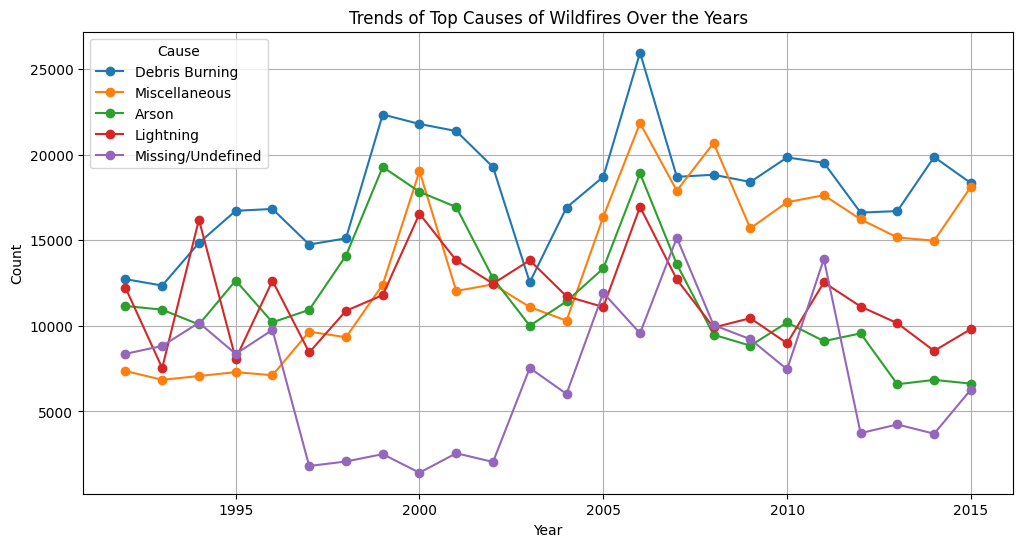

In [25]:

cause_year_counts = Fires.groupby(['FIRE_YEAR', 'STAT_CAUSE_DESCR']).size().unstack().fillna(0)
top_n_causes = cause_year_counts.sum().sort_values(ascending=False).head(5)
cause_year_counts[top_n_causes.index].plot(kind='line', marker='o', figsize=(12, 6))
plt.title('Trends of Top Causes of Wildfires Over the Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Cause')
plt.grid(True)
plt.show()


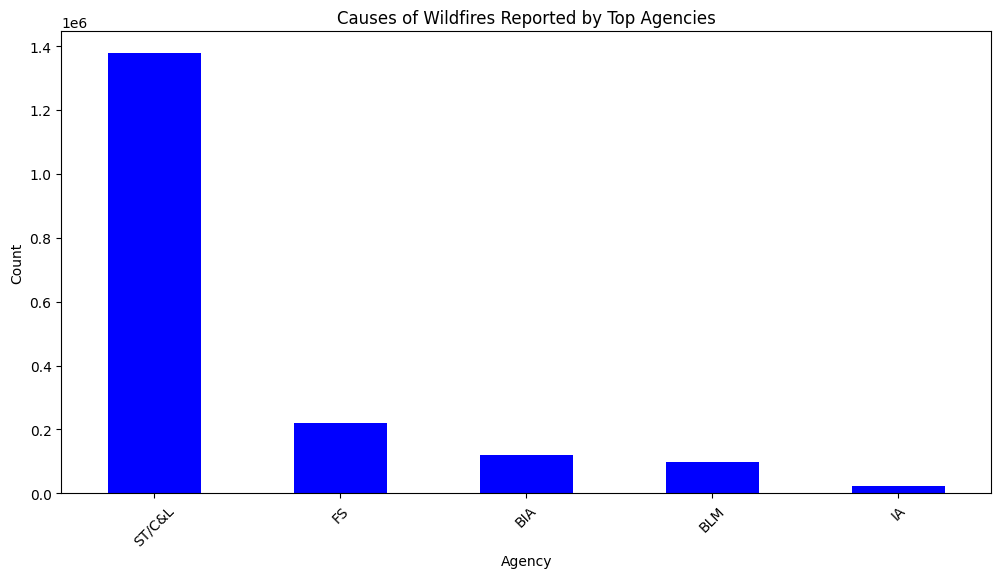

In [26]:
# Which reporting agencies (NWCG_REPORTING_AGENCY) are responsible for reporting the most wildfires, and do their causes differ?

agency_counts = Fires['NWCG_REPORTING_AGENCY'].value_counts()
top_n_agencies = agency_counts.head(5)  # You can choose the top N agencies to display
filtered_data = Fires[Fires['NWCG_REPORTING_AGENCY'].isin(top_n_agencies.index)]
plt.figure(figsize=(12, 6))
ax = filtered_data['NWCG_REPORTING_AGENCY'].value_counts().plot(kind='bar', color='blue')
ax.set_xlabel('Agency')
ax.set_ylabel('Count')
ax.set_title('Causes of Wildfires Reported by Top Agencies')
plt.xticks(rotation=45)
plt.show()


# Univariate Analysis 


1. What are the most common causes of wildfires based on the STAT_CAUSE_DESCR column? Understanding the distribution of causes is essential for targeting prevention and mitigation efforts effectively.
Temporal Analysis:

2. How has the frequency of wildfires evolved over the years (FIRE_YEAR)? Identifying trends and patterns in wildfire occurrences can inform resource allocation and preparedness measures.
Geographical Patterns of Wildfires:

3. Which states (STATE) experience the most and least wildfires? Analyzing the geographic distribution of wildfires is crucial for allocating resources and implementing region-specific strategies.

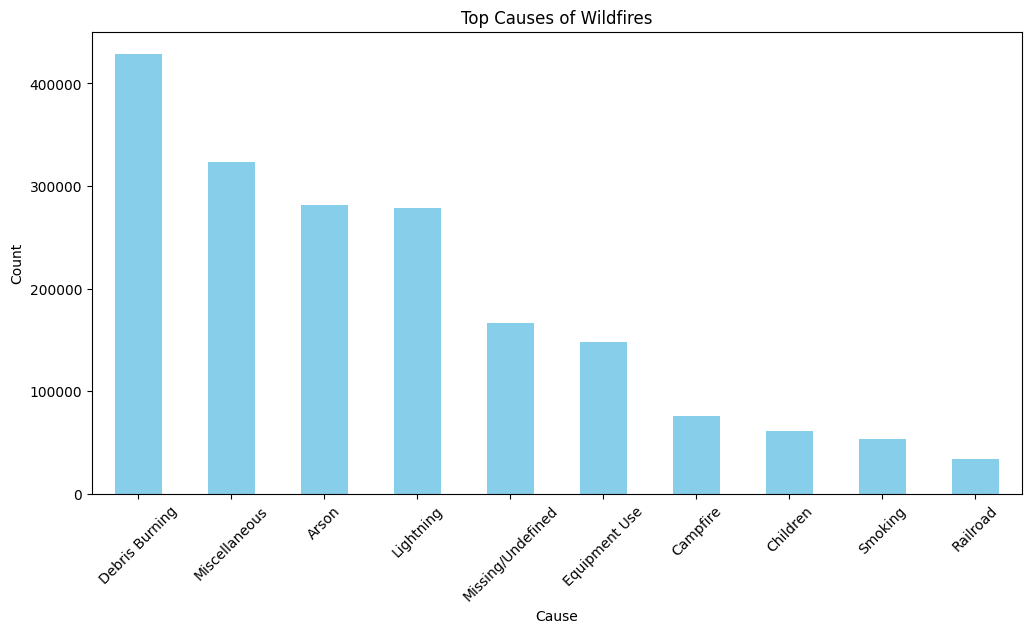

In [27]:
#What are the most common causes of wildfires based on the STAT_CAUSE_DESCR column?
cause_counts = Fires['STAT_CAUSE_DESCR'].value_counts()
top_n_causes = cause_counts.head(10)
plt.figure(figsize=(12, 6))
top_n_causes.plot(kind='bar', color='skyblue')
plt.title('Top Causes of Wildfires')
plt.xlabel('Cause')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

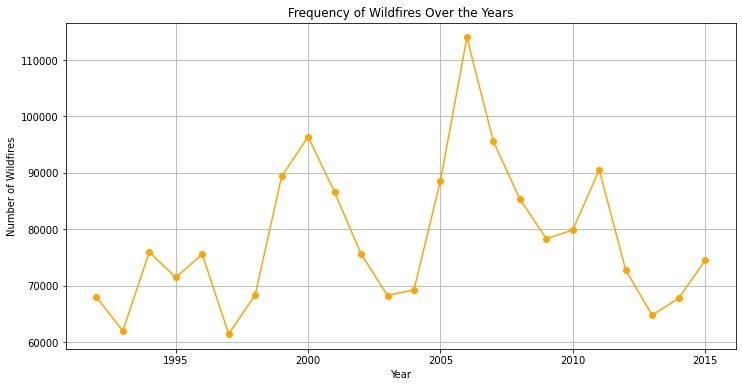

In [29]:
wildfire_counts = Fires['FIRE_YEAR'].value_counts().sort_index()

# Create a line plot to show the trend over the years
plt.figure(figsize=(12, 6))
wildfire_counts.plot(kind='line', marker='o', color='orange')
plt.title('Frequency of Wildfires Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Wildfires')
plt.grid(True)

# Display the plot
plt.show()

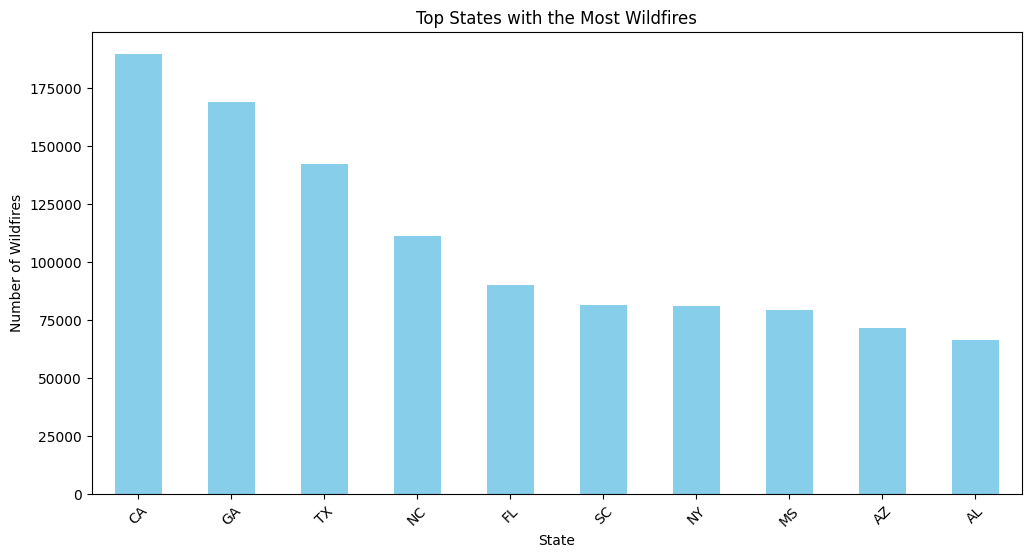

In [27]:
state_counts = Fires['STATE'].value_counts()
top_n_states = state_counts.head(10)
plt.figure(figsize=(12, 6))
top_n_states.plot(kind='bar', color='skyblue')
plt.title('Top States with the Most Wildfires')
plt.xlabel('State')
plt.ylabel('Number of Wildfires')
plt.xticks(rotation=45)

# Display the plot
plt.show()

# Bivariate Analysis 

1. Is there a significant correlation between the size of wildfires (FIRE_SIZE) and the time it takes to contain them (CONT_DOY)? Understanding this relationship can help assess the efficiency of wildfire containment efforts.


2. Do specific geographic regions, defined by latitude and longitude (LATITUDE and LONGITUDE), exhibit variations in the distribution of wildfire causes (STAT_CAUSE_DESCR)? Exploring this relationship can provide insights into the spatial factors influencing fire causes.


3. Are there changes in the distribution of wildfire causes (STAT_CAUSE_DESCR) over the years (FIRE_YEAR)? Identifying trends in wildfire causes can be crucial for wildfire prevention and management strategies.

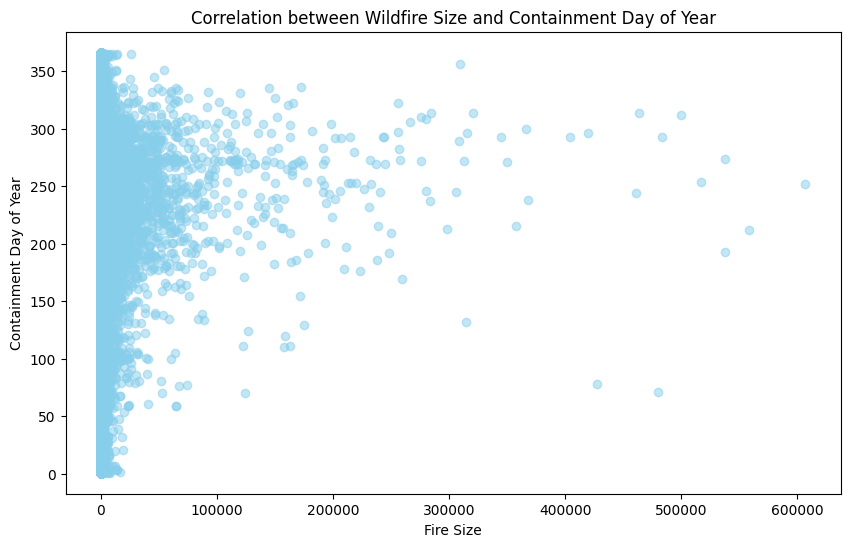

In [28]:
filtered_data = Fires.dropna(subset=['FIRE_SIZE', 'CONT_DOY'])

# Create a scatter plot to examine the correlation between fire size and containment day of year
plt.figure(figsize=(10, 6))
plt.scatter(filtered_data['FIRE_SIZE'], filtered_data['CONT_DOY'], color='skyblue', alpha=0.5)
plt.title('Correlation between Wildfire Size and Containment Day of Year')
plt.xlabel('Fire Size')
plt.ylabel('Containment Day of Year')

# Display the plot
plt.show()

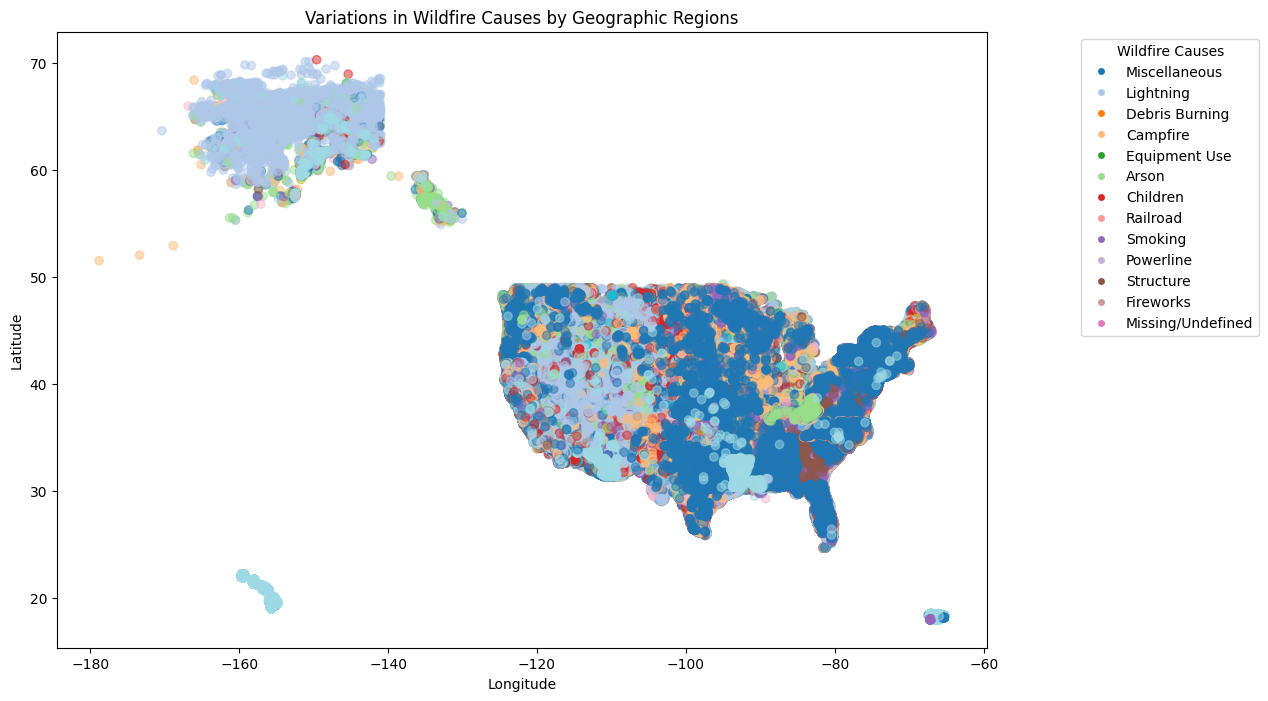

In [29]:


# Filter the data to exclude records with missing values in 'LATITUDE', 'LONGITUDE', or 'STAT_CAUSE_DESCR'
filtered_data = Fires.dropna(subset=['LATITUDE', 'LONGITUDE', 'STAT_CAUSE_DESCR'])

# Create a scatter plot to visualize variations in causes by geographic regions
plt.figure(figsize=(12, 8))

# Map cause names to unique integers for color assignment
cause_mapping = {cause: idx for idx, cause in enumerate(filtered_data['STAT_CAUSE_DESCR'].unique())}
colors = [cause_mapping[cause] for cause in filtered_data['STAT_CAUSE_DESCR']]

scatter = plt.scatter(
    filtered_data['LONGITUDE'],
    filtered_data['LATITUDE'],
    c=colors,
    cmap='tab20',  # Use a colormap for distinct colors
    alpha=0.5
)

# Create a legend with cause names and corresponding colors
legend_labels = [cause for cause in cause_mapping.keys()]
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=plt.cm.tab20(idx)) for idx, label in enumerate(legend_labels)]
plt.legend(handles=legend_handles, title='Wildfire Causes', loc='upper right', bbox_to_anchor=(1.3, 1))

plt.title('Variations in Wildfire Causes by Geographic Regions')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Display the plot
plt.show()


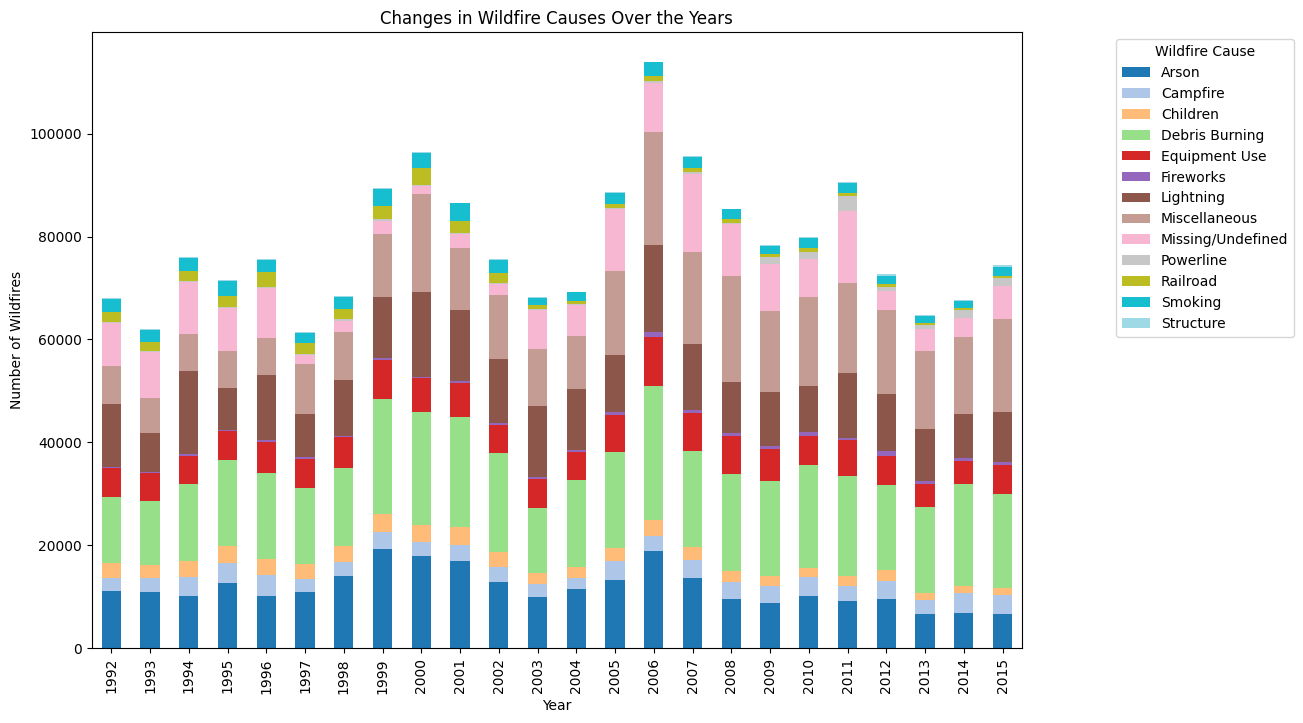

In [30]:
filtered_data = Fires.dropna(subset=['FIRE_YEAR', 'STAT_CAUSE_DESCR'])
cause_year_counts = filtered_data.groupby(['FIRE_YEAR', 'STAT_CAUSE_DESCR']).size().unstack().fillna(0)

# Create a stacked bar chart to show changes in cause distribution over the years
plt.figure(figsize=(12, 8))
cause_year_counts.plot(kind='bar', stacked=True, colormap='tab20', ax=plt.gca())

plt.title('Changes in Wildfire Causes Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Wildfires')

# Display the plot
plt.legend(title='Wildfire Cause', loc='upper right', bbox_to_anchor=(1.3, 1))
plt.show()

# Multivariate Analysis

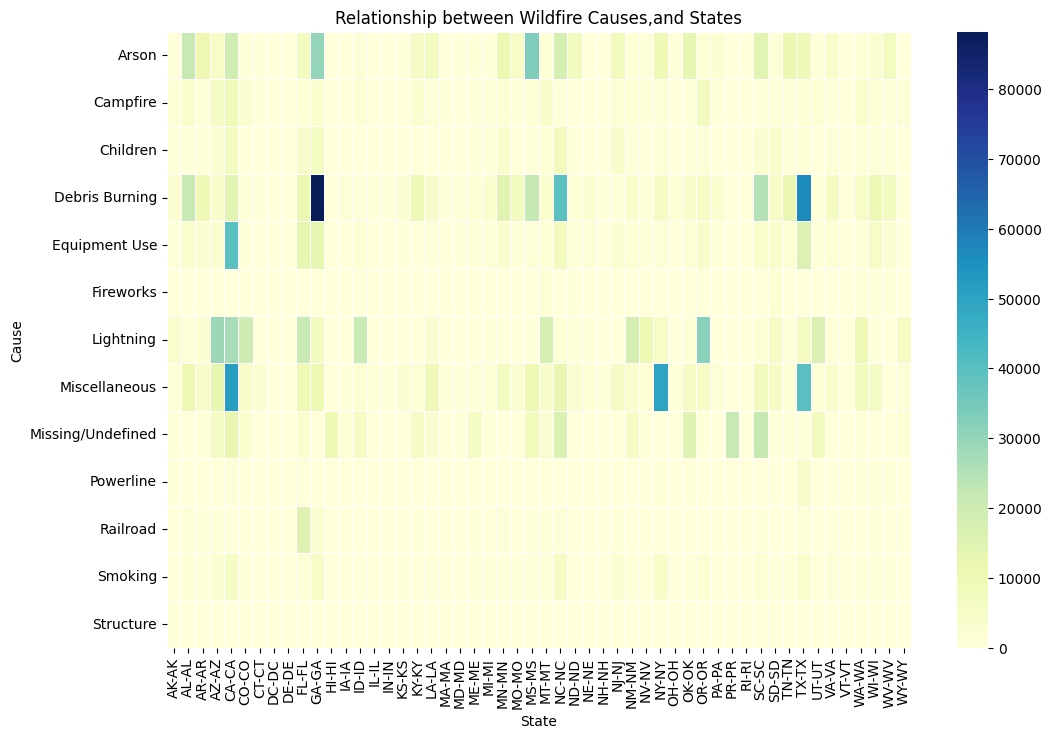

In [31]:
filtered_data = Fires.dropna(subset=['STAT_CAUSE_DESCR', 'STATE', 'STATE'])
contingency_table = pd.crosstab(filtered_data['STAT_CAUSE_DESCR'], [filtered_data['STATE'], filtered_data['STATE']])
chi2, p, _, _ = chi2_contingency(contingency_table)
alpha = 0.05
plt.figure(figsize=(12, 8))
sns.heatmap(contingency_table, cmap='YlGnBu', linewidths=0.5)
plt.title('Relationship between Wildfire Causes,and States')
plt.xlabel('State')
plt.ylabel('Cause')
plt.show()

In [28]:
Fires.columns

Index(['OBJECTID', 'FOD_ID', 'FPA_ID', 'SOURCE_SYSTEM_TYPE', 'SOURCE_SYSTEM',
       'NWCG_REPORTING_AGENCY', 'NWCG_REPORTING_UNIT_ID',
       'NWCG_REPORTING_UNIT_NAME', 'SOURCE_REPORTING_UNIT',
       'SOURCE_REPORTING_UNIT_NAME', 'LOCAL_INCIDENT_ID', 'FIRE_YEAR',
       'DISCOVERY_DATE', 'DISCOVERY_DOY', 'DISCOVERY_TIME', 'STAT_CAUSE_CODE',
       'STAT_CAUSE_DESCR', 'CONT_DATE', 'CONT_DOY', 'CONT_TIME', 'FIRE_SIZE',
       'FIRE_SIZE_CLASS', 'LATITUDE', 'LONGITUDE', 'OWNER_CODE', 'OWNER_DESCR',
       'STATE', 'COUNTY', 'FIPS_CODE', 'FIPS_NAME', 'Shape'],
      dtype='object')

In [29]:
Fires

,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,LOCAL_INCIDENT_ID,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
0,1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,0511,Plumas National Forest,PNF-47,2005,2453403.5,33,1300,9.0,Miscellaneous,2453403.5,33.0,1730,0.10,A,40.036944,-121.005833,5.0,USFS,CA,63,063,Plumas,b'\x00\x01\xad\x10\x00\x00\xe8d\xc2\x92_@^\xc0...
1,2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,13,2004,2453137.5,133,0845,1.0,Lightning,2453137.5,133.0,1530,0.25,A,38.933056,-120.404444,5.0,USFS,CA,61,061,Placer,b'\x00\x01\xad\x10\x00\x00T\xb6\xeej\xe2\x19^\...
2,3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,021,2004,2453156.5,152,1921,5.0,Debris Burning,2453156.5,152.0,2024,0.10,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA,17,017,El Dorado,b'\x00\x01\xad\x10\x00\x00\xd0\xa5\xa0W\x13/^\...
3,4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,6,2004,2453184.5,180,1600,1.0,Lightning,2453189.5,185.0,1400,0.10,A,38.559167,-119.913333,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00\x94\xac\xa3\rt\xfa]...
4,5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,7,2004,2453184.5,180,1600,1.0,Lightning,2453189.5,185.0,1200,0.10,A,38.559167,-119.933056,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00@\xe3\xaa.\xb7\xfb]\...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880460,1880461,300348363,2015CAIRS29019636,NONFED,ST-CACDF,ST/C&L,USCASHU,Shasta-Trinity Unit,CASHU,Shasta-Trinity Unit,009371,2015,2457291.5,269,1726,13.0,Missing/Undefined,2457291.5,269.0,1843,0.01,A,40.481637,-122.389375,13.0,STATE OR PRIVATE,CA,None,None,None,b'\x00\x01\xad\x10\x00\x00P\xb8\x1e\x85\xeb\x9...
1880461,1880462,300348373,2015CAIRS29217935,NONFED,ST-CACDF,ST/C&L,USCATCU,Tuolumne-Calaveras Unit,CATCU,Tuolumne-Calaveras Unit,000366,2015,2457300.5,278,0126,9.0,Miscellaneous,NaN,NaN,None,0.20,A,37.617619,-120.938570,12.0,MUNICIPAL/LOCAL,CA,None,None,None,b'\x00\x01\xad\x10\x00\x00\x00\x80\xbe\x88\x11...
1880462,1880463,300348375,2015CAIRS28364460,NONFED,ST-CACDF,ST/C&L,USCATCU,Tuolumne-Calaveras Unit,CATCU,Tuolumne-Calaveras Unit,000158,2015,2457144.5,122,2052,13.0,Missing/Undefined,NaN,NaN,None,0.10,A,37.617619,-120.938570,12.0,MUNICIPAL/LOCAL,CA,None,None,None,b'\x00\x01\xad\x10\x00\x00\x00\x80\xbe\x88\x11...
1880463,1880464,300348377,2015CAIRS29218079,NONFED,ST-CACDF,ST/C&L,USCATCU,Tuolumne-Calaveras Unit,CATCU,Tuolumne-Calaveras Unit,000380,2015,2457309.5,287,2309,13.0,Missing/Undefined,NaN,NaN,None,2.00,B,37.672235,-120.898356,12.0,MUNICIPAL/LOCAL,CA,None,None,None,b'\x00\x01\xad\x10\x00\x00x\xba_\xaa~9^\xc0\xb...


In [30]:
Fires.isnull().sum()

OBJECTID                           0
FOD_ID                             0
FPA_ID                             0
SOURCE_SYSTEM_TYPE                 0
SOURCE_SYSTEM                      0
NWCG_REPORTING_AGENCY              0
NWCG_REPORTING_UNIT_ID             0
NWCG_REPORTING_UNIT_NAME           0
SOURCE_REPORTING_UNIT              0
SOURCE_REPORTING_UNIT_NAME         0
LOCAL_INCIDENT_ID             820821
FIRE_YEAR                          0
DISCOVERY_DATE                     0
DISCOVERY_DOY                      0
DISCOVERY_TIME                882638
STAT_CAUSE_CODE                    0
STAT_CAUSE_DESCR                   0
CONT_DATE                     891531
CONT_DOY                      891531
CONT_TIME                     972173
FIRE_SIZE                          0
FIRE_SIZE_CLASS                    0
LATITUDE                           0
LONGITUDE                          0
OWNER_CODE                         0
OWNER_DESCR                        0
STATE                              0
C

In [ ]:
# From the above lets remove the columns which has null values, cause Technically these columns arfe not so important and the null values are move than 30% of the columns 

In [32]:
Fires['FIPS_NAME'].value_counts()

FIPS_NAME
Washington        11014
Lincoln           10571
Jackson            9902
Marion             8908
Cherokee           8558
                  ...  
Terrebonne            1
Milwaukee             1
Kingfisher            1
Glacier County        1
Garvin                1
Name: count, Length: 1698, dtype: int64

# So the Target column is STAT_CAUSE_DESCR which says what is the cause of wildfire, so our target is to predict the cause of wildfire using the other column information like firezire etc 

In [33]:
# How many different types of causes we are seeing 
Fires['STAT_CAUSE_DESCR'].value_counts()

STAT_CAUSE_DESCR
Debris Burning       429028
Miscellaneous        323805
Arson                281455
Lightning            278468
Missing/Undefined    166723
Equipment Use        147612
Campfire              76139
Children              61167
Smoking               52869
Railroad              33455
Powerline             14448
Fireworks             11500
Structure              3796
Name: count, dtype: int64

In [34]:
Fires['STAT_CAUSE_CODE'].value_counts()

STAT_CAUSE_CODE
5.0     429028
9.0     323805
7.0     281455
1.0     278468
13.0    166723
2.0     147612
4.0      76139
8.0      61167
3.0      52869
6.0      33455
11.0     14448
10.0     11500
12.0      3796
Name: count, dtype: int64

In [44]:
# We do already have a column which represents Cause of fire in codes, we can remove the description of it as we already have codes column '
 

In [35]:
print(Fires['NWCG_REPORTING_UNIT_NAME'].value_counts())

NWCG_REPORTING_UNIT_NAME
Georgia Forestry Commission                      167123
Texas A & M Forest Service                       111362
North Carolina Forest Service                    107424
Florida Forest Service                            83024
South Carolina Forestry Commission                78977
                                                  ...  
Oregon Coast National Wildlife Refuge Complex         1
Coleman National Fish Hatchery                        1
Steigerwald Lake National Wildlife Refuge             1
Cedar Breaks National Monument                        1
Fort Matanzas National Monument                       1
Name: count, Length: 1635, dtype: int64


In [58]:
NWCG_value_counts = Fires['NWCG_REPORTING_UNIT_NAME'].value_counts()

In [36]:
# Selecting the columns which I think will logically with in building the model
selected_columns= ['SOURCE_SYSTEM_TYPE', 'SOURCE_SYSTEM', 'SOURCE_REPORTING_UNIT', 'DISCOVERY_DOY', 'STAT_CAUSE_CODE', 'FIRE_YEAR', 'LATITUDE', 'LONGITUDE', 'OWNER_CODE', 'FIRE_SIZE_CLASS', 'STATE', 'COUNTY']
Fires_model = Fires[selected_columns]

In [37]:
Fires_model

,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,SOURCE_REPORTING_UNIT,DISCOVERY_DOY,STAT_CAUSE_CODE,FIRE_YEAR,LATITUDE,LONGITUDE,OWNER_CODE,FIRE_SIZE_CLASS,STATE,COUNTY
0,FED,FS-FIRESTAT,0511,33,9.0,2005,40.036944,-121.005833,5.0,A,CA,63
1,FED,FS-FIRESTAT,0503,133,1.0,2004,38.933056,-120.404444,5.0,A,CA,61
2,FED,FS-FIRESTAT,0503,152,5.0,2004,38.984167,-120.735556,13.0,A,CA,17
3,FED,FS-FIRESTAT,0503,180,1.0,2004,38.559167,-119.913333,5.0,A,CA,3
4,FED,FS-FIRESTAT,0503,180,1.0,2004,38.559167,-119.933056,5.0,A,CA,3
...,...,...,...,...,...,...,...,...,...,...,...,...
1880460,NONFED,ST-CACDF,CASHU,269,13.0,2015,40.481637,-122.389375,13.0,A,CA,None
1880461,NONFED,ST-CACDF,CATCU,278,9.0,2015,37.617619,-120.938570,12.0,A,CA,None
1880462,NONFED,ST-CACDF,CATCU,122,13.0,2015,37.617619,-120.938570,12.0,A,CA,None
1880463,NONFED,ST-CACDF,CATCU,287,13.0,2015,37.672235,-120.898356,12.0,B,CA,None


In [38]:
# Drop missing values
Fires_model = Fires_model.dropna()

In [39]:
Fires_model

,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,SOURCE_REPORTING_UNIT,DISCOVERY_DOY,STAT_CAUSE_CODE,FIRE_YEAR,LATITUDE,LONGITUDE,OWNER_CODE,FIRE_SIZE_CLASS,STATE,COUNTY
0,FED,FS-FIRESTAT,0511,33,9.0,2005,40.036944,-121.005833,5.0,A,CA,63
1,FED,FS-FIRESTAT,0503,133,1.0,2004,38.933056,-120.404444,5.0,A,CA,61
2,FED,FS-FIRESTAT,0503,152,5.0,2004,38.984167,-120.735556,13.0,A,CA,17
3,FED,FS-FIRESTAT,0503,180,1.0,2004,38.559167,-119.913333,5.0,A,CA,3
4,FED,FS-FIRESTAT,0503,180,1.0,2004,38.559167,-119.933056,5.0,A,CA,3
...,...,...,...,...,...,...,...,...,...,...,...,...
1872300,NONFED,ST-NASF,CAAEU,278,13.0,2015,38.691628,-121.372908,14.0,A,CA,SACRAMENTO
1872301,NONFED,ST-NASF,CATCU,294,9.0,2015,38.172881,-120.801955,15.0,A,CA,CALAVERAS
1872302,NONFED,ST-NASF,CARRU,331,9.0,2015,33.919157,-116.882973,14.0,A,CA,RIVERSIDE
1872303,NONFED,ST-NASF,CAFKU,325,5.0,2015,37.110917,-119.322918,14.0,A,CA,FRESNO


In [57]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
Fires_model['FIRE_SIZE_CLASS'] = label_encoder.fit_transform(Fires_model['FIRE_SIZE_CLASS'])
Fires_model['STATE'] = label_encoder.fit_transform(Fires_model['STATE'])

C:\Users\kommu\AppData\Local\Temp\ipykernel_14928\1438617163.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Fires_model['FIRE_SIZE_CLASS'] = label_encoder.fit_transform(Fires_model['FIRE_SIZE_CLASS'])
C:\Users\kommu\AppData\Local\Temp\ipykernel_14928\1438617163.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Fires_model['STATE'] = label_encoder.fit_transform(Fires_model['STATE'])


In [58]:
Fires_model

,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,SOURCE_REPORTING_UNIT,DISCOVERY_DOY,STAT_CAUSE_CODE,FIRE_YEAR,LATITUDE,LONGITUDE,OWNER_CODE,FIRE_SIZE_CLASS,STATE,COUNTY
0,FED,FS-FIRESTAT,192,33,9.0,2005,40.036944,-121.005833,5.0,0,4,63
1,FED,FS-FIRESTAT,184,133,1.0,2004,38.933056,-120.404444,5.0,0,4,61
2,FED,FS-FIRESTAT,184,152,5.0,2004,38.984167,-120.735556,13.0,0,4,17
3,FED,FS-FIRESTAT,184,180,1.0,2004,38.559167,-119.913333,5.0,0,4,3
4,FED,FS-FIRESTAT,184,180,1.0,2004,38.559167,-119.933056,5.0,0,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...
1872300,NONFED,ST-NASF,775,278,13.0,2015,38.691628,-121.372908,14.0,0,4,SACRAMENTO
1872301,NONFED,ST-NASF,838,294,9.0,2015,38.172881,-120.801955,15.0,0,4,CALAVERAS
1872302,NONFED,ST-NASF,821,331,9.0,2015,33.919157,-116.882973,14.0,0,4,RIVERSIDE
1872303,NONFED,ST-NASF,797,325,5.0,2015,37.110917,-119.322918,14.0,0,4,FRESNO


In [59]:
Fires_model['SOURCE_SYSTEM_TYPE'] = label_encoder.fit_transform(Fires_model['SOURCE_SYSTEM_TYPE'])
Fires_model['SOURCE_SYSTEM'] = label_encoder.fit_transform(Fires_model['SOURCE_SYSTEM'])

C:\Users\kommu\AppData\Local\Temp\ipykernel_14928\3390551191.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Fires_model['SOURCE_SYSTEM_TYPE'] = label_encoder.fit_transform(Fires_model['SOURCE_SYSTEM_TYPE'])
C:\Users\kommu\AppData\Local\Temp\ipykernel_14928\3390551191.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Fires_model['SOURCE_SYSTEM'] = label_encoder.fit_transform(Fires_model['SOURCE_SYSTEM'])


In [60]:
Fires_model['COUNTY'] = label_encoder.fit_transform(Fires_model['COUNTY'])

C:\Users\kommu\AppData\Local\Temp\ipykernel_14928\611883652.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Fires_model['COUNTY'] = label_encoder.fit_transform(Fires_model['COUNTY'])


In [61]:
print(Fires_model.columns)


Index(['SOURCE_SYSTEM_TYPE', 'SOURCE_SYSTEM', 'SOURCE_REPORTING_UNIT',
       'DISCOVERY_DOY', 'STAT_CAUSE_CODE', 'FIRE_YEAR', 'LATITUDE',
       'LONGITUDE', 'OWNER_CODE', 'FIRE_SIZE_CLASS', 'STATE', 'COUNTY'],
      dtype='object')


In [62]:
Fires_model

,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,SOURCE_REPORTING_UNIT,DISCOVERY_DOY,STAT_CAUSE_CODE,FIRE_YEAR,LATITUDE,LONGITUDE,OWNER_CODE,FIRE_SIZE_CLASS,STATE,COUNTY
0,0,2,192,33,9.0,2005,40.036944,-121.005833,5.0,0,4,199
1,0,2,184,133,1.0,2004,38.933056,-120.404444,5.0,0,4,197
2,0,2,184,152,5.0,2004,38.984167,-120.735556,13.0,0,4,100
3,0,2,184,180,1.0,2004,38.559167,-119.913333,5.0,0,4,151
4,0,2,184,180,1.0,2004,38.559167,-119.933056,5.0,0,4,151
...,...,...,...,...,...,...,...,...,...,...,...,...
1872300,2,17,775,278,13.0,2015,38.691628,-121.372908,14.0,0,4,2693
1872301,2,17,838,294,9.0,2015,38.172881,-120.801955,15.0,0,4,622
1872302,2,17,821,331,9.0,2015,33.919157,-116.882973,14.0,0,4,2582
1872303,2,17,797,325,5.0,2015,37.110917,-119.322918,14.0,0,4,1193


In [63]:
print(Fires.columns)


Index(['OBJECTID', 'FOD_ID', 'FPA_ID', 'SOURCE_SYSTEM_TYPE', 'SOURCE_SYSTEM',
       'NWCG_REPORTING_AGENCY', 'NWCG_REPORTING_UNIT_ID',
       'NWCG_REPORTING_UNIT_NAME', 'SOURCE_REPORTING_UNIT',
       'SOURCE_REPORTING_UNIT_NAME', 'LOCAL_INCIDENT_ID', 'FIRE_YEAR',
       'DISCOVERY_DATE', 'DISCOVERY_DOY', 'DISCOVERY_TIME', 'STAT_CAUSE_CODE',
       'STAT_CAUSE_DESCR', 'CONT_DATE', 'CONT_DOY', 'CONT_TIME', 'FIRE_SIZE',
       'FIRE_SIZE_CLASS', 'LATITUDE', 'LONGITUDE', 'OWNER_CODE', 'OWNER_DESCR',
       'STATE', 'COUNTY', 'FIPS_CODE', 'FIPS_NAME', 'Shape'],
      dtype='object')


In [64]:
Fires_model['SOURCE_REPORTING_UNIT'] = label_encoder.fit_transform(Fires_model['SOURCE_REPORTING_UNIT'])


C:\Users\kommu\AppData\Local\Temp\ipykernel_14928\2820702487.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Fires_model['SOURCE_REPORTING_UNIT'] = label_encoder.fit_transform(Fires_model['SOURCE_REPORTING_UNIT'])


In [65]:
Fires_model

,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,SOURCE_REPORTING_UNIT,DISCOVERY_DOY,STAT_CAUSE_CODE,FIRE_YEAR,LATITUDE,LONGITUDE,OWNER_CODE,FIRE_SIZE_CLASS,STATE,COUNTY
0,0,2,192,33,9.0,2005,40.036944,-121.005833,5.0,0,4,199
1,0,2,184,133,1.0,2004,38.933056,-120.404444,5.0,0,4,197
2,0,2,184,152,5.0,2004,38.984167,-120.735556,13.0,0,4,100
3,0,2,184,180,1.0,2004,38.559167,-119.913333,5.0,0,4,151
4,0,2,184,180,1.0,2004,38.559167,-119.933056,5.0,0,4,151
...,...,...,...,...,...,...,...,...,...,...,...,...
1872300,2,17,775,278,13.0,2015,38.691628,-121.372908,14.0,0,4,2693
1872301,2,17,838,294,9.0,2015,38.172881,-120.801955,15.0,0,4,622
1872302,2,17,821,331,9.0,2015,33.919157,-116.882973,14.0,0,4,2582
1872303,2,17,797,325,5.0,2015,37.110917,-119.322918,14.0,0,4,1193


In [66]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
X = Fires_model.drop('STAT_CAUSE_CODE', axis=1)
y = Fires_model['STAT_CAUSE_CODE']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logistic_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)

C:\Users\kommu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\kommu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kommu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:146

Accuracy: 0.30075603832590325
Classification Report:
              precision    recall  f1-score   support

         1.0       0.37      0.47      0.41     31194
         2.0       0.00      0.00      0.00     17889
         3.0       0.00      0.00      0.00      6506
         4.0       0.00      0.00      0.00      9124
         5.0       0.29      0.93      0.44     61685
         6.0       0.00      0.00      0.00      5493
         7.0       0.42      0.00      0.01     32456
         8.0       0.00      0.00      0.00      6256
         9.0       0.00      0.00      0.00     41400
        10.0       0.00      0.00      0.00       680
        11.0       0.00      0.00      0.00      2325
        12.0       0.00      0.00      0.00       415
        13.0       0.75      0.01      0.02     25041

    accuracy                           0.30    240464
   macro avg       0.14      0.11      0.07    240464
weighted avg       0.26      0.30      0.17    240464



In [68]:
model = DecisionTreeClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)

Accuracy: 0.5176533701510413
Classification Report:
              precision    recall  f1-score   support

         1.0       0.71      0.71      0.71     31194
         2.0       0.28      0.29      0.28     17889
         3.0       0.12      0.13      0.12      6506
         4.0       0.30      0.31      0.31      9124
         5.0       0.55      0.53      0.54     61685
         6.0       0.41      0.44      0.43      5493
         7.0       0.47      0.48      0.48     32456
         8.0       0.14      0.15      0.15      6256
         9.0       0.45      0.45      0.45     41400
        10.0       0.22      0.23      0.22       680
        11.0       0.15      0.15      0.15      2325
        12.0       0.05      0.06      0.05       415
        13.0       0.91      0.90      0.91     25041

    accuracy                           0.52    240464
   macro avg       0.37      0.37      0.37    240464
weighted avg       0.52      0.52      0.52    240464



In [69]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)


Accuracy: 0.6137758666577949
Classification Report:
              precision    recall  f1-score   support

         1.0       0.76      0.82      0.79     31194
         2.0       0.41      0.31      0.35     17889
         3.0       0.27      0.10      0.14      6506
         4.0       0.49      0.35      0.41      9124
         5.0       0.58      0.72      0.64     61685
         6.0       0.55      0.55      0.55      5493
         7.0       0.58      0.54      0.56     32456
         8.0       0.28      0.12      0.17      6256
         9.0       0.55      0.56      0.55     41400
        10.0       0.41      0.19      0.26       680
        11.0       0.32      0.13      0.19      2325
        12.0       0.10      0.02      0.03       415
        13.0       0.92      0.93      0.92     25041

    accuracy                           0.61    240464
   macro avg       0.48      0.41      0.43    240464
weighted avg       0.60      0.61      0.60    240464



In [87]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)


Accuracy: 0.6137758666577949
Classification Report:
              precision    recall  f1-score   support

         1.0       0.76      0.82      0.79     31194
         2.0       0.41      0.31      0.35     17889
         3.0       0.27      0.10      0.14      6506
         4.0       0.49      0.35      0.41      9124
         5.0       0.58      0.72      0.64     61685
         6.0       0.55      0.55      0.55      5493
         7.0       0.58      0.54      0.56     32456
         8.0       0.28      0.12      0.17      6256
         9.0       0.55      0.56      0.55     41400
        10.0       0.41      0.19      0.26       680
        11.0       0.32      0.13      0.19      2325
        12.0       0.10      0.02      0.03       415
        13.0       0.92      0.93      0.92     25041

    accuracy                           0.61    240464
   macro avg       0.48      0.41      0.43    240464
weighted avg       0.60      0.61      0.60    240464

